# Test-Driven Development (TDD)

Test-driven development follows a three-phase process. The three phases are:

1. **RED**. We write a failing test (including possibly compilation failures). We run the test suite to verify the failing tests.
2. **GREEN**. We write just enough production code to make the test green. We run the test suite the verify this.
3. **REFACTOR**. We remove any code-smells. These may be due to duplication, hard-coded values, or improper use of language idioms (e.g. using a verbose loop instead of a built-in iterator). If we break any tests during refactoring, we prioritize getting them back to green before exiting this phase.

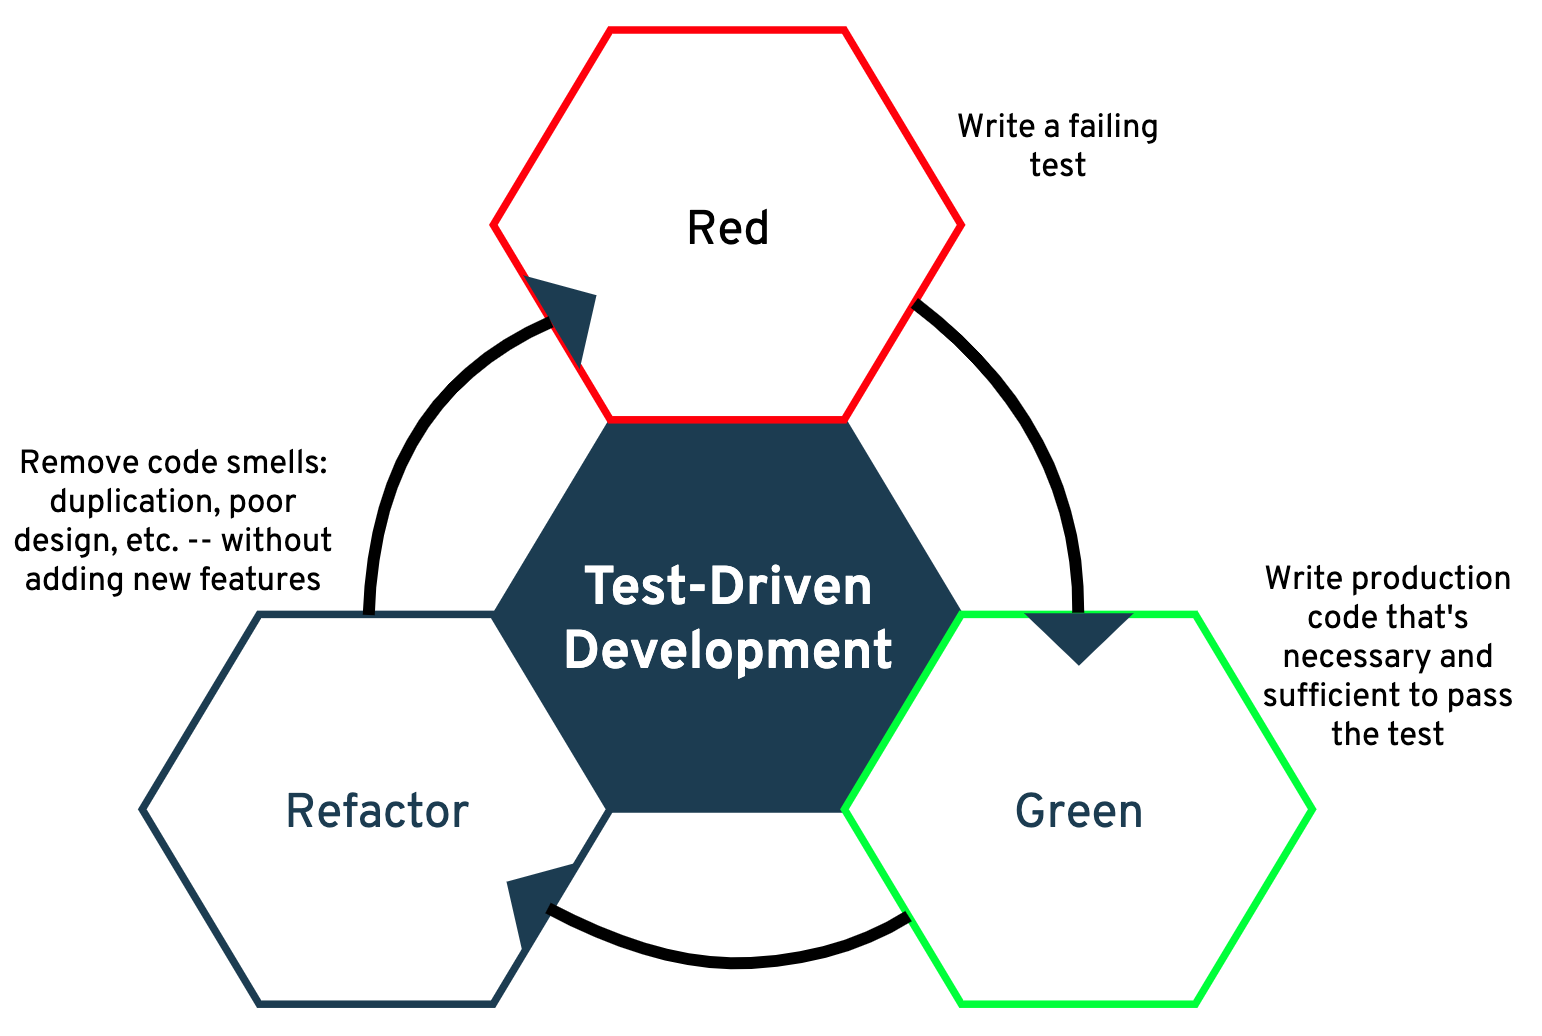

## Money Problem

Suppose we want to manage money (let's say a portfolio of different shares) like the following:

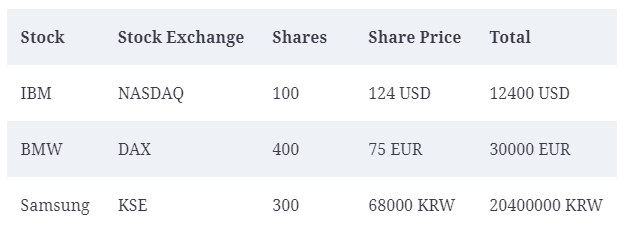

We will make sure that arithmatic is correct. So we will design tests:

- 5 USD x 2 = 10 USD
- 10 EUR x 2 = 20 EUR
- 4002 KRW / 4 = 1000.5 KRW
- 5 USD + 10 EUR = 17 USD
- 1 USD + 1100 KRW = 2200 KRW

## 5 USD x 2 = 10 USD

### Starting with RED

In [ ]:
%%writefile test_money.py
import unittest

class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Writing test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ERROR

ERROR: testMultiplication (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 5, in testMultiplication
    fiver = Dollar(5)
NameError: name 'Dollar' is not defined

----------------------------------------------------------------------
Ran 1 test in 0.000s

FAILED (errors=1)


That’s our first failing test. Hooray!

### Going for GREEN

In [ ]:
%%writefile test_money.py
import unittest

class Dollar:
  pass

class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ERROR

ERROR: testMultiplication (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 8, in testMultiplication
    fiver = Dollar(5)
TypeError: Dollar() takes no arguments

----------------------------------------------------------------------
Ran 1 test in 0.000s

FAILED (errors=1)


In [ ]:
%%writefile test_money.py
import unittest

class Dollar:
  def __init__(self, amount):
    pass

class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ERROR

ERROR: testMultiplication (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 10, in testMultiplication
    tenner = fiver.times(2)
AttributeError: 'Dollar' object has no attribute 'times'

----------------------------------------------------------------------
Ran 1 test in 0.000s

FAILED (errors=1)


We see a pattern here: our test is still failing, but for slightly different reasons each time. As we define our abstractions — first Dollar and then an amount field — the error messages “improve” to the next stage. This is a hallmark of TDD: steady progress at a pace we control.

Let’s speed things up a bit by defining a times function and giving it the minimum behavior to get to green. What’s the minimum behavior necessary? Always returning a “ten dollar” object that’s required by our test, of course!

In [ ]:
%%writefile test_money.py
import unittest


class Dollar:
  def __init__(self, amount):
    self.amount = amount

  def times(self, multiplier):
    return Dollar(10)


class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


### Cleaning up
Refactoring is the third and final stage of the RGR cycle. We may not have many lines of code at this point, however, it’s still important to keep things tidy and compact. If we have any formatting clutter or commented out lines of code, now is the time to clean it up.

More significant is the need to remove duplication and make code readable. At first blush, it may seem that in our fewer than two dozen lines of code, there can’t be any duplication. However, there is already a subtle yet significant bit of duplication.

In [ ]:
%%writefile test_money.py
import unittest


class Dollar:
  def __init__(self, amount):
    self.amount = amount

  def times(self, multiplier):
    return Dollar(5 * 2)


class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [ ]:
%%writefile test_money.py
import unittest


class Dollar:
  def __init__(self, amount):
    self.amount = amount

  def times(self, multiplier):
    return Dollar(self.amount * multiplier)


class TestMoney(unittest.TestCase):
  def testMultiplication(self):
    fiver = Dollar(5)
    tenner = fiver.times(2)
    self.assertEqual(10, tenner.amount)

if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


Hooray! The test remains green, and the duplication and the coupling are gone.

The goal of test-driven development isn’t to force us to go slow. Or fast, for that matter. Its goal is to allow us to go at a pace we’re comfortable with: speeding up when we can, slowing down when we should.

## 10 EUR x 2 = 20 EUR

This indicates that we need a more general entity than the Dollar. Something like Money, which encapsulates an amount (which we already have) and a currency (which we do not yet have). Let’s write tests to flush out this new feature.

Let’s add a new test in the TestMoney class. This test would verify that multiplying an object representing “10 Euros” by 2 gives us an object representing “20 Euros”:

In [ ]:
%%writefile test_money.py
import unittest


class Dollar:
    def __init__(self, amount):
      self.amount = amount

    def times(self, multiplier):
        return Dollar(self.amount * multiplier)


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiver = Dollar(5)
        tenner = fiver.times(2)
        self.assertEqual(10, tenner.amount)
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = tenEuros.times(2)
        self.assertEqual(20, twentyEuros.amount)
        self.assertEqual("EUR", twentyEuros.currency)


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplication (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


Wait a minute: didn’t we just create a horrendous duplication in our code? The new entity we created to represent Money subsumes what we wrote earlier for Dollar. This can’t possibly be good. A oft-quoted rule in writing code is the DRY principle: Don’t Repeat Yourself.

Recall the RED-GREEN-REFACTOR cycle. What we did got us to green, but we haven’t done the necessary refactoring yet. Let’s remove the duplication in the code while keeping our tests green.

The Money class’s functionality is a superset of that of the Dollar class. Which means we don’t need the latter. Let’s delete the Dollar class in its entirety.

Having done this, we get the familiar NameError: name 'Dollar' is not defined message when we run the tests. Let’s refactor the first test to use Money instead of the erstwhile Dollar:

In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiver = Money(5, "USD")
        tenner = fiver.times(2)
        self.assertEqual(10, tenner.amount)
        self.assertEqual("USD", tenner.currency)
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = tenEuros.times(2)
        self.assertEqual(20, twentyEuros.amount)
        self.assertEqual("EUR", twentyEuros.currency)


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


> Note: We could delete one of the tests and still feel confident about our code. However, we also want to safeguard ourselves against accidental regression in our code. Recall that our very first implementation used hard-coded numbers (10 or 5 * 2). Having two distinct tests with different values ensures that we won’t accidentally go back to that naive implementation.

> Tip: Regression — “a return to a primitive or less developed state" — is a common theme in writing software. Having a battery of tests is a reliable way to ensure that we don’t break existing features as we build new ones.

## 4002 KRW / 4 = 1000.5 KRW

The next requirement is to allow division. On the surface, it looks very similar to multiplication. We know from elementary mathematics that dividing by x is the same as multiplying by 1⁠/⁠x.

Let’s test-drive this new feature and see how our code evolves. By now, we are getting into the groove of starting with a failing test. As an indicator of our growing confidence, we’ll introduce two new things in our test:

- A new currency: Korean Won (KRW), and
- Numbers with fractional parts, e.g. 1000.5

In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiver = Money(5, "USD")
        tenner = fiver.times(2)
        self.assertEqual(10, tenner.amount)
        self.assertEqual("USD", tenner.currency)
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = tenEuros.times(2)
        self.assertEqual(20, twentyEuros.amount)
        self.assertEqual("EUR", twentyEuros.currency)

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        actualMoneyAfterDivision = originalMoney.divide(4)
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision.amount,
                        actualMoneyAfterDivision.amount)
        self.assertEqual(expectedMoneyAfterDivision.currency,
                        actualMoneyAfterDivision.currency)


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


Yay! The tests are green. Python is a dynamically (and strongly) typed language. This makes implementing this feature easier than languages with static typing.

### Cleaning

Comparing two Money objects piecemeal is verbose and tedious. In our tests, we verify that the amount and currency fields of Money objects are equal, over and over. Wouldn’t it be nice to be able to compare two Money objects directly in a single line of code?

In Python, object equality is ultimately resolved by an invocation of the __eq__ method. By default, this method returns true if the two object references being compared in fact point to the same object. This is a very strict definition of equality: it means that an object is only equal to itself, not any other object, even of the two objects have the same state.

Fortunately, it is not only possible but recommended to override the __eq__ method when needed. Let us explicitly override this method within the definition of our Money class:

In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = tenEuros.times(2)
        self.assertEqual(20, twentyEuros.amount)
        self.assertEqual("EUR", twentyEuros.currency)

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        actualMoneyAfterDivision = originalMoney.divide(4)
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision.amount,
                        actualMoneyAfterDivision.amount)
        self.assertEqual(expectedMoneyAfterDivision.currency,
                        actualMoneyAfterDivision.currency)


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


## 5 USD + 10 EUR = 17 USD

To test drive the next feature — 5 USD + 10 EUR = 17 USD — it’s enlightening to first sketch out how our program will evolve. TDD plays nicely with software design, contrary to prevailing myths!

The feature, as described in our feature list, says that 5 Dollars and 10 Euros should add up to 17 Dollars, assuming we get 1.2 Dollars for exchanging one Euro.

We realize that “Adding Dollars to Dollars results in Dollars” is an oversimplification. The general principle is that adding Money in different currencies gives us a Portfolio; which we can then express in any one currency (given the necessary Exchange Rates between currencies).

Did we just introduce a new entity: Portfolio? You bet! It’s vital to let our code reflect the realities of our domain. We’re writing code to represent a collection of stock holdings; for which the correct term is a Portfolio. 2

When we add two or more Money s, we should get a Portfolio. We can extend this domain model by saying that we should be able to evaluate a Portfolio in any specific currency. These nouns and verbs give us an idea about the new abstractions in our code which we’ll drive out through tests.

### 5 USD + 10 USD = 15 USD

**RED**

In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ERROR
testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

ERROR: testAddition (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 39, in testAddition
    portfolio = Portfolio()
NameError: name 'Portfolio' is not defined

----------------------------------------------------------------------
Ran 4 tests in 0.001s

FAILED (errors=1)


**GREEN**

In [ ]:
%%writefile test_money.py
import unittest


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class Portfolio:
    def add(self, *moneys):
        pass

    def evaluate(self, currency):
        return Money(15, "USD")


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


**REFACTOR**

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        pass

    def evaluate(self, currency):
        total = functools.reduce(
            operator.add, map(lambda m: m.amount, self.moneys)
        )
        return Money(total, currency)


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ERROR
testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

ERROR: testAddition (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 57, in testAddition
    self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))
  File "test_money.py", line 30, in evaluate
    operator.add, map(lambda m: m.amount, self.moneys)
TypeError: reduce() of empty sequence with no initial value

----------------------------------------------------------------------
Ran 4 tests in 0.001s

FAILED (errors=1)


Ah: this gives us a new error! TypeError: reduce() of empty sequence with no initial value. We realize two things:
- The add method in Portfolio is still a no-op. That’s why our self.moneys is an empty array; and
- Notwithstanding the above problem, our code should still work with an empty array.

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(
            operator.add, map(lambda m: m.amount, self.moneys), 0)
        return Money(total, currency)


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


### Modularization
The first thing we’ll do is to separate the test code from the production code. This will require us to solve the problem of “including”, “importing”, or “requiring” the production code in the test code. It is vital that this should always be a one-way dependency.

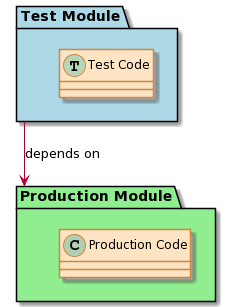

In [ ]:
%%writefile money.py

class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

Writing money.py


In [ ]:
%%writefile portfolio.py
import functools
import operator

from money import Money


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(
            operator.add, map(lambda m: m.amount, self.moneys), 0)
        return Money(total, currency)

Overwriting portfolio.py


In [ ]:
%%writefile test_money.py
import unittest

from money import Money
from portfolio import Portfolio


class TestMoney(unittest.TestCase):
    def testMultiplicationInDollars(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))
    
    def testMultiplicationInEuros(self):
        tenEuros = Money(10, "EUR")
        twentyEuros = Money(20, "EUR")
        self.assertEqual(twentyEuros, tenEuros.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplicationInDollars (__main__.TestMoney) ... ok
testMultiplicationInEuros (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


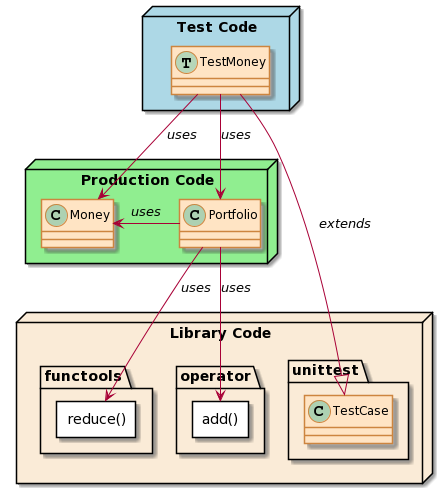

### Removing redundancy in tests
We currently have two tests for multiplication, and one each for division and addition. The two tests for multiplication test the same functionality in the Money class. This is a bit of duplication we can do without. Let’s delete the testMultiplicationInDollars and rename the other test to simply testMultiplication. The resulting symmetry — three tests for the three features (Multiplication, Division, and Addition) where each test uses a different currency (Euros, Wons, and Dollars respectively) — is both compact and elegant.

In [ ]:
%%writefile test_money.py
import unittest

from money import Money
from portfolio import Portfolio


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


## 5 USD + 10 EUR = 17 USD

In [ ]:
%%writefile test_money.py
import unittest

from money import Money
from portfolio import Portfolio


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue)


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testAdditionOfDollarsAndEuros (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 33, in testAdditionOfDollarsAndEuros
    self.assertEqual(expectedValue, actualValue)
AssertionError: <money.Money object at 0x7f241083e1d0> != <money.Money object at 0x7f241083e2d0>

----------------------------------------------------------------------
Ran 4 tests in 0.001s

FAILED (failures=1)


We expect the test to fail, of course, because we are in the RED phase of our of RGR cycle. However, the error message from the assertion failure is rather cryptic:

```AssertionError: <money.Money object at 0x7f241083e1d0> != <money.Money object at 0x7f241083e2d0>```

Who on earth knows what mysterious goblins reside at those obscure memory addresses!

This is one of those times where we must slow down and write a better failing test before we attempt to get to GREEN. Can we make the assertion statement print a more helpful error message?

The assertEqual method — like most other assertion methods in the unittest package — takes an optional third parameter, which is a custom error message. Let’s provide a formatted string showing the stringified representation of expectedValue and actualValue:

> Note: We are not following modular approach because we are learning and are in Jupyter environment. So its better to keep it in same file. But since we covered modularity topic, we know how to make the code modular for future projects.

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(
            operator.add, map(lambda m: m.amount, self.moneys), 0)
        return Money(total, currency)


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testAdditionOfDollarsAndEuros (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 64, in testAdditionOfDollarsAndEuros
    "%s != %s"%(expectedValue, actualValue))
AssertionError: <__main__.Money object at 0x7f9651db0150> != <__main__.Money object at 0x7f9651db0390> : USD 17.00 != USD 15.00

----------------------------------------------------------------------
Ran 4 tests in 0.001s

FAILED (failures=1)


This validates our belief that the evaluate method, as currently implemented, mindlessly adds the amounts of all Money objects (5 and 10 in our test) to get the result, with no regard to the currencies (USD and EUR, respectively, in our test).

A closer examination of the evaluate method shows that the mindlessness is in the lambda expression. It maps every Money object to its amount, regardless of its currency. These amounts are then added up by the reduce function using the add operator.

What if the lambda expression mapped every Money object to its converted value? The target currency for the conversion would be the currency in which the Portfolio is being evaluated.

```python
total = functools.reduce(operator.add,
          map(lambda m: self.__convert(m, currency), self.moneys), 0)
```

How should we implement the __convert method? Converting to the same currency as that of the Money is trivial: the Money’s amount doesn’t change in this case. When converting to a different currency, we’ll multiply Money’s amount with the (for now) hard-coded exchange rate between USD and EUR:


In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(operator.add,
                                 map(lambda m: self.__convert(m, currency), self.moneys), 0)
        return Money(total, currency)

    def __convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            return aMoney.amount * 1.2


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


The test is green. Yay … and hmm! We should do the refactoring to remove the ugliness of this code. Here are some problems with it:
- The exchange rate is hard-coded. It should be declared as a variable.
- The exchange rate isn’t dependent on the currency. It should be looked up based on the two currencies involved.
- The exchange rate should be modifiable.

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []
        self._eur_to_usd = 1.2

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(operator.add,
                                 map(lambda m: self.__convert(m, currency), self.moneys), 0)
        return Money(total, currency)

    def __convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            return aMoney.amount * self._eur_to_usd


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


Here’s the current state of our evaluate feature vis-à-vis Money s in a Portfolio:
1. When “converting” a Money in a currency to the same currency, it returns the amount of the Money. This is correct: the exchange rate for any currency to itself is 1.
2. In all other cases, the amount of the Money is multiplied by a fixed number (1.2). This is correct in a very limited sense: this rate ensures conversions from USD to EUR only. There is no way to modify this exchange rate or specify any other rate.

Our currency conversion code does one thing correctly and another thing almost correctly. It’s time to make it work correctly in both cases. In this chapter, we’ll introduce — at long last — the conversion of money from one currency into another using currency-specific exchange rates.

What we need is a hashmap that allows us to look up exchange rates given a “from” currency and a “to” currency. The hashmap would be a representation of an exchange rate table we regularly see in banks and currency exchange counters at airports.

## 1 USD + 1100 KRW = 2200 KRW

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []
        self._eur_to_usd = 1.2

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(operator.add,
                                 map(lambda m: self.__convert(m, currency), self.moneys), 0)
        return Money(total, currency)

    def __convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            return aMoney.amount * self._eur_to_usd


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testAdditionOfDollarsAndWons (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 81, in testAdditionOfDollarsAndWons
    "%s != %s"%(expectedValue, actualValue))
AssertionError: <__main__.Money object at 0x7fb46441a4d0> != <__main__.Money object at 0x7fb46441a5d0> : KRW 2200.00 != KRW 1101.20

----------------------------------------------------------------------
Ran 5 tests in 0.001s

FAILED (failures=1)


The __convert method is using the rate eurToUsd, which is incorrect for this case. That’s where the peculiar amount 1101.20 comes from.

Let’s introduce a dictionary to store exchange rates. We’ll add the two entries we need currently: EUR→USD = 1.2 and USD→KRW = 1100. We’ll keep this dictionary in the __convert method to begin with:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(operator.add,
                                 map(lambda m: self.__convert(m, currency), self.moneys), 0)
        return Money(total, currency)

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.001s

OK


With these changes, all our tests turn green again.

## Error Handling

We’d like to raise an Exception when evaluate fails due to missing exchange rates. In its message, the exception should describe all the missing exchange rate keys (ie. the “from” and “to” currencies). Let’s start with a test that validates this behavior.

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = functools.reduce(operator.add,
                                 map(lambda m: self.__convert(m, currency), self.moneys), 0)
        return Money(total, currency)

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney)
----------------------------------------------------------------------
KeyError: 'USD->Kalganid'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test_money.py", line 94, in testAdditionWithMultipleMissingExchangeRates
    portfolio.evaluate("Kalganid")
AssertionError: "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]" does not match "'USD->Kalganid'"

----------------------------------------------------------------------
Ran 6 tests in 0.001s

FAILED (failures=1)


> Note: assertRaisesRegex is one of the many useful assertion methods defined in Python’s TestCase class. Since our exception string has several characters that have special meaning in regular expressions, we escape them using the backslash character.

This test is similar to the existing tests for addition, with a couple of differences. First: we are attempting to evaluate a Portfolio in “Kalganid”, for which no exchange rates exist. Second: we expect the evaluate method to throw an exception with a specific error message that we verify in the assertRaisesRegex statement.

The test fails with two exceptions. First, there’s the KeyError which we expect: there is no exchange rate key involving the “Kalganid” currency. The second error is the assertion failure we sought to cause. 

We need to modify our evaluate method to respond to Exceptions arising from its calls to __convert. Let’s unroll the lambda expression into a loop and add a try ... except block to capture any failures. If there are no failures, we return a new Money object as before. If there are failures, we raise an Exception whose message is a comma-separated list of the stringified KeyError exceptions that are caught:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(str(f) for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney)
----------------------------------------------------------------------
Exception: Missing exchange rate(s):['USD->Kalganid','EUR->Kalganid','KRW->Kalganid']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test_money.py", line 104, in testAdditionWithMultipleMissingExchangeRates
    portfolio.evaluate("Kalganid")
AssertionError: "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]" does not match "Missing exchange rate(s):['USD->Kalganid','EUR->Kalganid','KRW->Kalganid']"

---------------------------------------------

A simple change to the way we assemble our failureMessage can fix our problem:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.001s

OK


## Banking

What is the name of the real world institution that helps us exchange money? A bank. Or a Currency Exchange. Often, a domain will have multiple similar entities that are indistinguishable from the perspective of our model. Learning which differences are salient and which are insignificant is vital to effective domain modeling.

We’ll select the name Bank to represent this missing entity. What should be the responsibilities of the Bank? It should hold exchange rates, for one thing. And it should be able to convert moneys between currencies based on the exchange rate from one currency to another. The Bank should allow asymmetric exchange rates, because that is true in the real world. Finally, the bank should clearly inform us when it cannot exchange money in one currency into a another currency because of a missing exchange rate.

Having identified the need for this new entity, the next question is: how should the dependencies between Bank and the other two existing entities — Money and Portfolio — look?

Clearly, Bank needs Money to operate. Portfolio would need both Money and Bank; the former association is one of aggregation and the latter is an interface dependency: Portfolio uses the convert method in Bank.

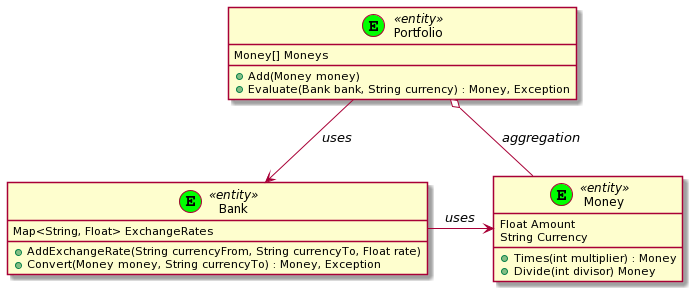

> Tip: The dependency of Portfolio to Bank is kept to a minimum: it is provided as a parameter to the Evaluate method. This type of dependency injection is called “Method Injection”, because we are “injecting” the dependency directly into the method that needs it.

The approach we’ll take will be a combination of writing new unit tests — which is the heart of TDD and what we’ve done thus far — and refactoring existing unit tests. We know that the existing tests provide a valuable safeguard: they verify that the features we’ve built, all the crossed-out lines on our list, work as expected. We’ll continue to run these tests, modifying their implementation as needed while keeping their purpose intact. This two-pronged approach of writing new tests and refactoring existing ones will give us the assurance we need as we heal our code of its ills.

Our first goal is to write a test to convert one Money object into another, using the as-yet-undefined Bank abstraction:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")

    def testConversion(self):
        bank = Bank()
        bank.addExchangeRate("EUR", "USD", 1.2)
        tenEuros = Money(10, "EUR")
        self.assertEqual(bank.convert(tenEuros, "USD"), Money(12, "USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ERROR
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

ERROR: testConversion (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 107, in testConversion
    bank = Bank()
NameError: name 'Bank' is not defined

----------------------------------------------------------------------
Ran 7 tests in 0.001s

FAILED (errors=1)


In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception("Failed")


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")

    def testConversion(self):
        bank = Bank()
        bank.addExchangeRate("EUR", "USD", 1.2)
        tenEuros = Money(10, "EUR")
        self.assertEqual(bank.convert(tenEuros, "USD"), Money(12, "USD"))


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.001s

OK


We write a new test that expects an Exception with a specific message from the convert method:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception("Failed")


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")

    def testConversion(self):
        bank = Bank()
        bank.addExchangeRate("EUR", "USD", 1.2)
        tenEuros = Money(10, "EUR")
        self.assertEqual(bank.convert(tenEuros, "USD"), Money(12, "USD"))

    def testConversionWithMissingExchangeRate(self):
        bank = Bank()
        tenEuros = Money(10, "EUR")
        with self.assertRaisesRegex(Exception, "EUR->Kalganid"):
            bank.convert(tenEuros, "Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ok
testConversionWithMissingExchangeRate (__main__.TestMoney) ... FAIL
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

FAIL: testConversionWithMissingExchangeRate (__main__.TestMoney)
----------------------------------------------------------------------
Exception: Failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test_money.py", line 134, in testConversionWithMissingExchangeRate
    bank.convert(tenEuros, "Kalganid")
AssertionError: "EUR->Kalganid" does not match "Failed"

----------------------------------------------------------------------
Ran 8 tests in 0.002s

FAILED (failures=1)


To fix this, we use key to create the Exception that’s raised from convert:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.__convert(m, currency)
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")

    def __convert(self, aMoney, aCurrency):
        exchangeRates = {'EUR->USD': 1.2, 'USD->KRW': 1100}
        if aMoney.currency == aCurrency:
            return aMoney.amount
        else:
            key = aMoney.currency + '->' + aCurrency
            return aMoney.amount * exchangeRates[key]

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception(key)


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")

    def testConversion(self):
        bank = Bank()
        bank.addExchangeRate("EUR", "USD", 1.2)
        tenEuros = Money(10, "EUR")
        self.assertEqual(bank.convert(tenEuros, "USD"), Money(12, "USD"))

    def testConversionWithMissingExchangeRate(self):
        bank = Bank()
        tenEuros = Money(10, "EUR")
        with self.assertRaisesRegex(Exception, "EUR->Kalganid"):
            bank.convert(tenEuros, "Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ok
testConversionWithMissingExchangeRate (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.001s

OK


All tests are green. With the new Bank class in place, we’re ready to change the evaluate method in Portfolio to accept a Bank object as a dependency. We have no fewer than four tests for addition of Money s which exercise the evaluate method. We fully expect these tests to fail, thereby keeping us firmly on the RGR track.

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, bank, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += self.convert(m, currency).amount
            except KeyError as ke:
                failures.append(ke)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")
        

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception(key)


class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate("USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate("KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate("Kalganid")

    def testConversion(self):
        bank = Bank()
        bank.addExchangeRate("EUR", "USD", 1.2)
        tenEuros = Money(10, "EUR")
        self.assertEqual(bank.convert(tenEuros, "USD"), Money(12, "USD"))

    def testConversionWithMissingExchangeRate(self):
        bank = Bank()
        tenEuros = Money(10, "EUR")
        with self.assertRaisesRegex(Exception, "EUR->Kalganid"):
            bank.convert(tenEuros, "Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ERROR
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ERROR
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ERROR
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... FAIL
testConversion (__main__.TestMoney) ... ok
testConversionWithMissingExchangeRate (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

ERROR: testAddition (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 83, in testAddition
    self.assertEqual(fifteenDollars, portfolio.evaluate("USD"))
TypeError: evaluate() missing 1 required positional argument: 'currency'

ERROR: testAdditionOfDollarsAndEuros (__main__.TestMoney)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_money.py", line 91, in testAdditionOfDollarsAndEuro

In the test methods, we can simply use self.bank as the first argument to each call to evaluate.

Also, it’d be nice if we could declare this initialization code once, rather than in each test. There is a way to do this. Our test class, by virtue of subclassing from unittest.TestCase, inherits its behavior. One aspect of this inherited behavior is that if there is a setUp method in the class, it’ll be called before each test. We can define our Bank object in this setUp method:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, bank, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += bank.convert(m, currency).amount
            except Exception as ex:
                failures.append(ex)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")
        

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception(key)


class TestMoney(unittest.TestCase):
    def setUp(self):
        self.bank = Bank()
        self.bank.addExchangeRate("EUR", "USD", 1.2)
        self.bank.addExchangeRate("USD", "KRW", 1100)

    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate(self.bank, "USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate(self.bank, "USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate(self.bank, "KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate(self.bank, "Kalganid")

    def testConversion(self):
        tenEuros = Money(10, "EUR")
        self.assertEqual(self.bank.convert(tenEuros, "USD"), Money(12, "USD"))

    def testConversionWithMissingExchangeRate(self):
        tenEuros = Money(10, "EUR")
        with self.assertRaisesRegex(Exception, "EUR->Kalganid"):
            self.bank.convert(tenEuros, "Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ok
testConversionWithMissingExchangeRate (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.001s

OK


## Allow exchange rates to be modified

We start by adding a few lines to the end of testConversion. We’ll vary the exchange rate between EUR and USD to 1.3 and assert that this new rate is used for a second conversion between the two currencies. Here’s the test method in its entirety:

In [ ]:
%%writefile test_money.py
import unittest
import functools
import operator


class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def times(self, multiplier):
        return Money(self.amount * multiplier, self.currency)

    def divide(self, divisor):
        return Money(self.amount / divisor, self.currency)

    def __eq__(self, other):
        return self.amount == other.amount and self.currency == other.currency

    def __str__(self):
        return f"{self.currency} {self.amount:0.2f}"


class Portfolio:
    def __init__(self):
        self.moneys = []

    def add(self, *moneys):
        self.moneys.extend(moneys)

    def evaluate(self, bank, currency):
        total = 0.0
        failures = []
        for m in self.moneys:
            try:
                total += bank.convert(m, currency).amount
            except Exception as ex:
                failures.append(ex)

        if len(failures) == 0:
            return Money(total, currency)

        failureMessage = ",".join(f.args[0] for f in failures)
        raise Exception("Missing exchange rate(s):[" + failureMessage + "]")
        

class Bank:
    def __init__(self):
        self.exchangeRates = {}

    def addExchangeRate(self, currencyFrom, currencyTo, rate):
        key = currencyFrom + "->" + currencyTo
        self.exchangeRates[key] = rate

    def convert(self, aMoney, aCurrency):
        if aMoney.currency == aCurrency:
            return Money(aMoney.amount, aCurrency)

        key = aMoney.currency + "->" + aCurrency
        if key in self.exchangeRates:
            return Money(aMoney.amount * self.exchangeRates[key], aCurrency)

        raise Exception(key)


class TestMoney(unittest.TestCase):
    def setUp(self):
        self.bank = Bank()
        self.bank.addExchangeRate("EUR", "USD", 1.2)
        self.bank.addExchangeRate("USD", "KRW", 1100)

    def testMultiplication(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        self.assertEqual(tenDollars, fiveDollars.times(2))

    def testDivision(self):
        originalMoney = Money(4002, "KRW")
        expectedMoneyAfterDivision = Money(1000.5, "KRW")
        self.assertEqual(expectedMoneyAfterDivision, originalMoney.divide(4))

    def testAddition(self):
        fiveDollars = Money(5, "USD")
        tenDollars = Money(10, "USD")
        fifteenDollars = Money(15, "USD")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenDollars)
        self.assertEqual(fifteenDollars, portfolio.evaluate(self.bank, "USD"))

    def testAdditionOfDollarsAndEuros(self):
        fiveDollars = Money(5, "USD")
        tenEuros = Money(10, "EUR")
        portfolio = Portfolio()
        portfolio.add(fiveDollars, tenEuros)
        expectedValue = Money(17, "USD")
        actualValue = portfolio.evaluate(self.bank, "USD")
        self.assertEqual(expectedValue, actualValue,
                "%s != %s"%(expectedValue, actualValue))

    def testAdditionOfDollarsAndWons(self):
        oneDollar = Money(1, "USD")
        elevenHundredWon = Money(1100, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, elevenHundredWon)
        expectedValue = Money(2200, "KRW")
        actualValue = portfolio.evaluate(self.bank, "KRW")
        self.assertEqual(expectedValue, actualValue,
        "%s != %s"%(expectedValue, actualValue))

    def testAdditionWithMultipleMissingExchangeRates(self):
        oneDollar = Money(1, "USD")
        oneEuro = Money(1, "EUR")
        oneWon = Money(1, "KRW")
        portfolio = Portfolio()
        portfolio.add(oneDollar, oneEuro, oneWon)
        with self.assertRaisesRegex(
            Exception,
            "Missing exchange rate\(s\):\[USD\->Kalganid,EUR->Kalganid,KRW->Kalganid]",
        ):
            portfolio.evaluate(self.bank, "Kalganid")

    def testConversion(self):
        tenEuros = Money(10, "EUR")
        self.assertEqual(self.bank.convert(tenEuros, "USD"), Money(12, "USD"))
        self.bank.addExchangeRate("EUR", "USD", 1.3)
        self.assertEqual(self.bank.convert(tenEuros, "USD"), Money(13, "USD"))

    def testConversionWithMissingExchangeRate(self):
        tenEuros = Money(10, "EUR")
        with self.assertRaisesRegex(Exception, "EUR->Kalganid"):
            self.bank.convert(tenEuros, "Kalganid")


if __name__ == '__main__':
    unittest.main()

Overwriting test_money.py


In [ ]:
!python test_money.py -v

testAddition (__main__.TestMoney) ... ok
testAdditionOfDollarsAndEuros (__main__.TestMoney) ... ok
testAdditionOfDollarsAndWons (__main__.TestMoney) ... ok
testAdditionWithMultipleMissingExchangeRates (__main__.TestMoney) ... ok
testConversion (__main__.TestMoney) ... ok
testConversionWithMissingExchangeRate (__main__.TestMoney) ... ok
testDivision (__main__.TestMoney) ... ok
testMultiplication (__main__.TestMoney) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.001s

OK


## CI with Github workflows

In [ ]:
!mkdir -p .github/workflows

In [ ]:
%%writefile .github/workflows/py.yml
name: Python CI
on:
  push:
    branches: [ main ]
jobs:
  build:
    name: Build
    strategy:
      matrix:
        python-version: [3.9.x, 3.8.x]
        platform: [ubuntu-latest, macos-latest, windows-latest]
    runs-on: ${{matrix.platform}}
    steps:
    - name: Set up Python ${{ matrix.python-version }}
      uses: actions/setup-python@v2
      with:
        python-version: ${{ matrix.python-version }}
    - name: Checkout code
      uses: actions/checkout@v2
    - name: Test
      run: python test_money.py -v
      shell: bash

Writing .github/workflows/py.yml
